# Titanic - Machine Learning from Disaster

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# open files
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
# transform to lowercase
train_data = train_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
train_data.columns = train_data.columns.str.lower()
# see the first 5 rows
train_data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,NaN,s
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,s


In [4]:
# see the general information 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div style="background-color: yellow;">
Missing values detected: age, cabin
</div>

In [5]:
# description statistics summary
train_data.describe(include = 'all')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"braund, mr. owen harris",male,NaN,NaN,NaN,347082,NaN,b96 b98,s
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sex_male'}>],
       [<Axes: title={'center': 'fam_on_board'}>, <Axes: >]], dtype=object)

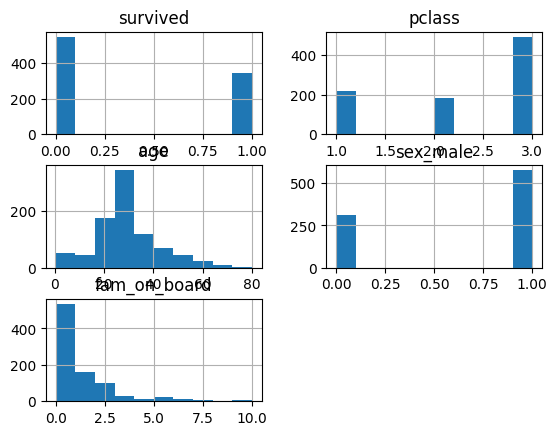

In [31]:
train_data.hist()

In [6]:
# fill missing values
train_data['age'].fillna(train_data['age'].mean(), inplace=True)
train_data['age'].isna().sum()

0

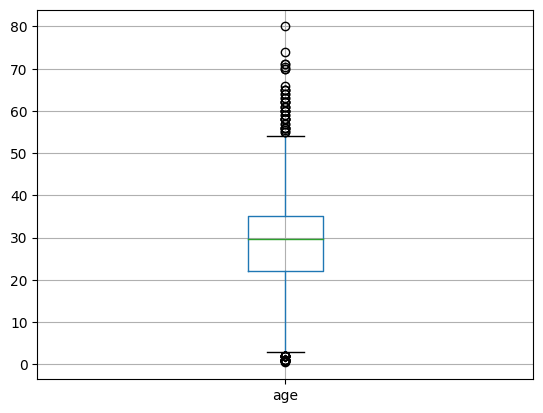

In [7]:
# check outliers in colum age
train_data.boxplot(column = 'age');

In [8]:
# delete columns
train_data.drop(['passengerid','name','ticket','fare','cabin','embarked'], axis = 1, inplace = True)
train_data.shape

(891, 6)

<div style="background-color: yellow;">
Сolumns passengerid, name, ticket, fare, cabin, embarked deleted as not significant.
</div>

In [9]:
# encode column sex
train_data = pd.get_dummies(train_data, columns = ['sex'], drop_first = True, dtype= int)

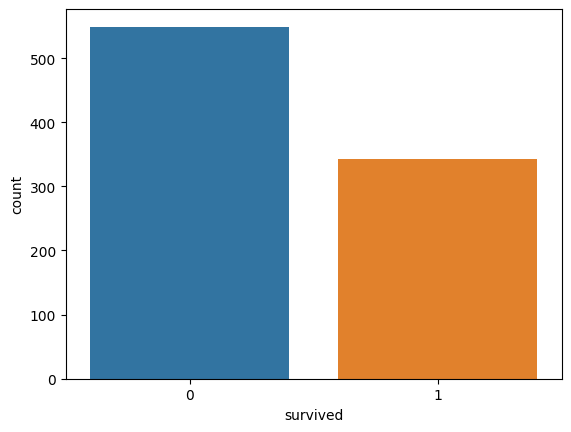

In [10]:
sns.countplot(data=train_data, x='survived');

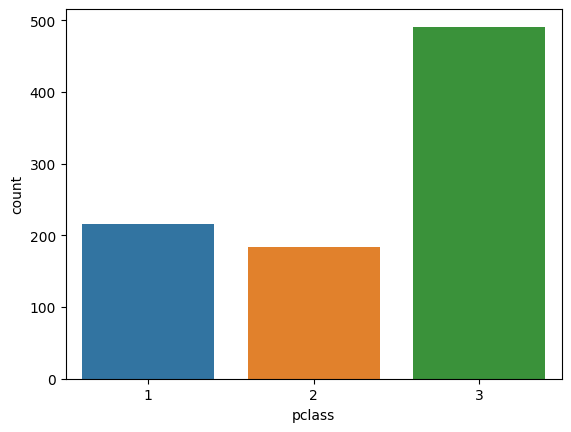

In [11]:
sns.countplot(data = train_data, x = 'pclass');

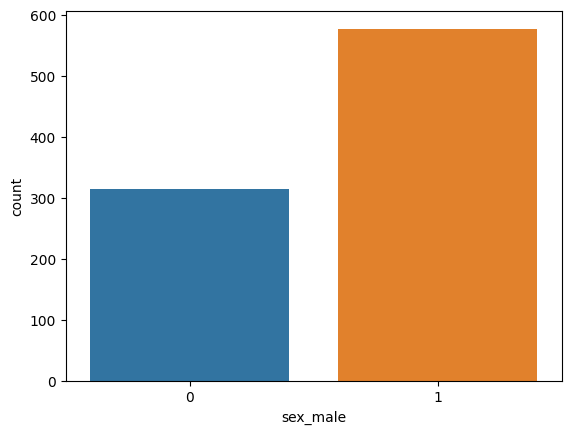

In [12]:
sns.countplot(data = train_data, x = 'sex_male');

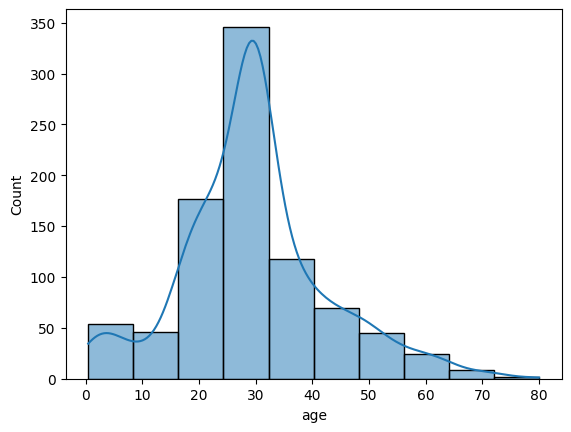

In [13]:
sns.histplot(data=train_data, x='age',bins=10, kde=True);

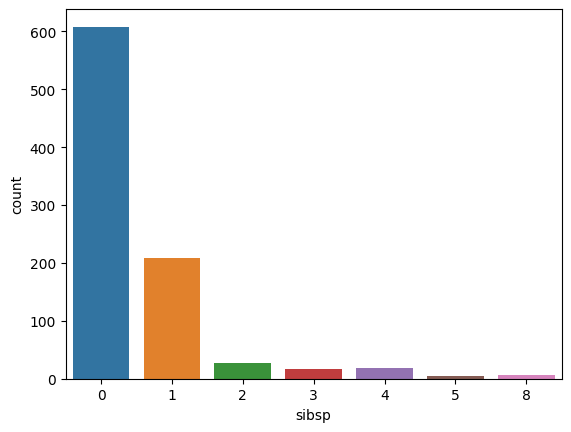

In [14]:
sns.countplot(data = train_data, x = 'sibsp');

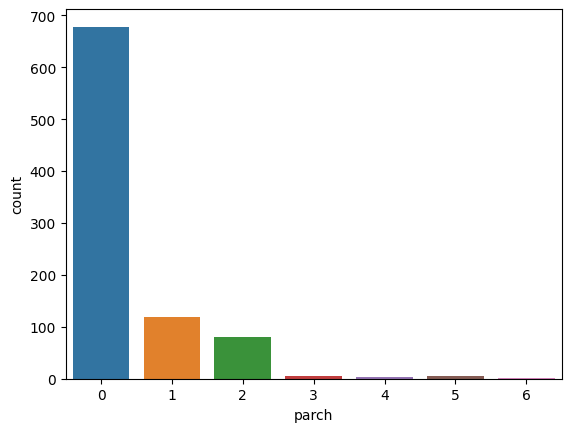

In [15]:
sns.countplot(data = train_data, x = 'parch');

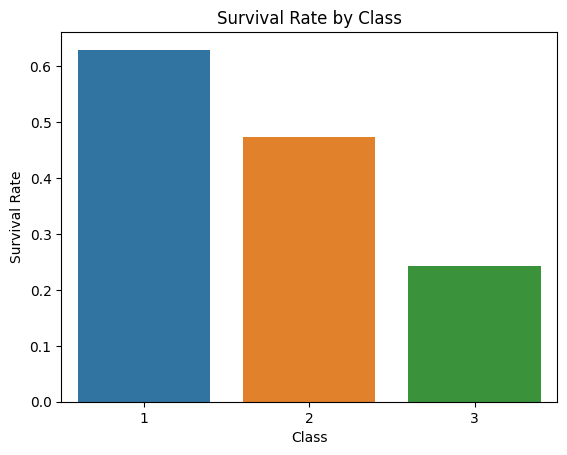

In [16]:
survived_class = train_data.groupby('pclass')['survived'].sum()
survived_class_ttl = train_data.groupby('pclass')['survived'].count()
survived_class_rate = survived_class/survived_class_ttl 
sns.barplot(x=survived_class_rate.index, y=survived_class_rate.values)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate');

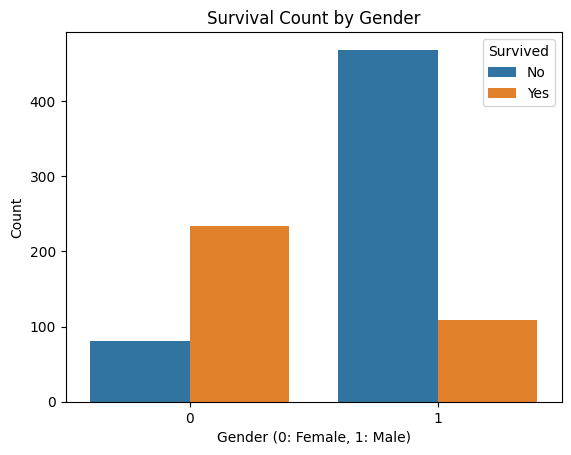

In [17]:
sns.countplot(x='sex_male', hue='survived', data=train_data)
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

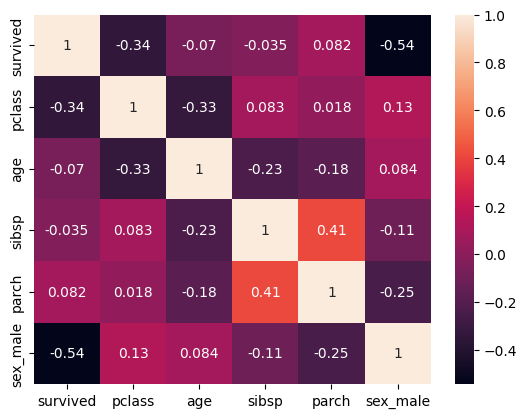

In [18]:
# correlation matrix
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [19]:
# add a new column fam_on_board and remove parch and sipsp
train_data['fam_on_board'] = train_data['parch'] + train_data['sibsp']
train_data.drop(['parch', 'sibsp'], axis=1, inplace=True)
train_data

,survived,pclass,age,sex_male,fam_on_board
0,0,3,22.000000,1,1
1,1,1,38.000000,0,1
2,1,3,26.000000,0,0
3,1,1,35.000000,0,1
4,0,3,35.000000,1,0
...,...,...,...,...,...
886,0,2,27.000000,1,0
887,1,1,19.000000,0,0
888,0,3,29.699118,0,3
889,1,1,26.000000,1,0


<div style="background-color: yellow;">
Сolumns parch (# of parents / children aboard the Titanic) and sibsp (# of siblings / spouses aboard the Titanic) replaced with a sum fam_on_board (parch+sibsp).
</div>

In [20]:
X = train_data.drop('survived', axis=1)
y = train_data['survived']

In [21]:
# split on train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1209)

In [22]:
X_train.shape

(623, 4)

In [23]:
X_test.shape

(268, 4)

In [24]:
# standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.81750579, -0.69142917,  0.74405373, -0.54922725],
       [-1.56242928,  0.00836273,  0.74405373, -0.54922725],
       [-0.37246175,  0.11301092,  0.74405373, -0.54922725],
       ...,
       [-1.56242928, -0.0478771 ,  0.74405373,  0.07516796],
       [-0.37246175, -0.0478771 , -1.34398895, -0.54922725],
       [ 0.81750579, -0.28920913,  0.74405373, -0.54922725]])

In [26]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_train_scaled)

In [27]:
# Получите коэффициенты (нагрузки) для каждого признака в первой и второй компонентах
loadings = pca.components_

# Получите долю объясненной дисперсии для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_

# Определите важность каждого исходного признака для каждой компоненты
feature_importance = loadings * explained_variance_ratio[:, np.newaxis]

# Выведите важность признаков для каждой компоненты
print("Важность признаков для каждой компоненты:")
print(feature_importance)

Важность признаков для каждой компоненты:
[[ 0.1928688  -0.25053639 -0.05828629  0.1667517 ]
 [-0.15952626  0.02469921 -0.21903542  0.14505954]]


In [28]:
model = SVC(class_weight='balanced', random_state=1309)
params = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_pca, y_train)
grid_search.best_estimator_

SVC(C=10, class_weight='balanced', gamma=0.1, random_state=1309)

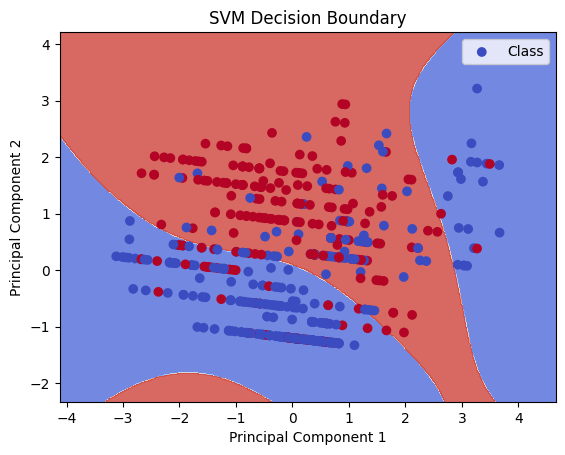

In [29]:
# Определите границы для графика
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Генерируйте сетку точек для графика
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Получите предсказания модели для сетки точек
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Постройте контур границы решения
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Отобразите точки данных
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, label='Class')

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary')
plt.show()

In [30]:
y_pred = grid_search.predict(X_test_scaled)

ValueError: X has 4 features, but SVC is expecting 2 features as input.

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
test_data

In [ ]:
test_data = test_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
test_data.columns = test_data.columns.str.lower()
test_data['age'].fillna(test_data['age'].mean(), inplace=True)
features = ['pclass', 'sex', 'age', 'sibsp','parch']
X_test = test_data[features]
X_test = pd.get_dummies(X_test, columns = ['sex'], drop_first = True, dtype= int)
X_test['fam_on_board'] = test_data['parch'] + test_data['sibsp']
X_test = X_test.drop(['parch', 'sibsp'], axis=1)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#predictions = grid_search.predict(X_test_scaled)

#output = pd.DataFrame({'PassengerId': test_data.passengerid, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")